### Data Report: "The Interplay of Crop Plantation and Climate Change: Cultivating Understanding for a Sustainable Future"
The question is: "Which crops are most impactful on climate change, and which alternatives could be pursued for reduced environmental impact?"


# 1. Introduction


#### 1.1 Overview


This project looks at how various types of crops had affected the climate change. We want to find if there is a link  about increase of countries temprature and amount of crop that is being harvested. Here different messures of crop production such as seeds, yields and gross production are considred as well. My intention is to use statistics and some machine learning methods to find out a relation between crops and global warming so that we get better understanding of the most dangerous crops for environment as well.

#### 1.2 Datasets in details


### Datasource1:Climate Change: Earth Surface Temperature Data

* Metadata URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
* Data URLs: can be downloaded through the Kaggle API in this project the data of countries are being used https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
* Data Type: CSV

This datasets shows the trend of daily tempreture of different cities, regions and countries in the world.

* date
* Average temperature
* Average temperature uncertainity
* City
* Country
* Latitude
* Longitude


ATTRIBUTION-NONCOMMERCIAL-SHAREALIKE 4.0 INTERNATIONAL

Free to share and adapt with giving the appropriate credit.
https://creativecommons.org/licenses/by-nc-sa/4.0/

### Datasource2: Global Food & Agriculture Statistics

* Metadata URL: https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics
* Data URL: Only the data regarding crops is being used https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics?select=fao_data_crops_data.csv
* Data Type: CSV

Given data set has the information of various crops harvested in different countries. There are different types of crops and their respective elements since agriculture has different abstracts of products.

* country_or_area
* element_code
* element
* year
* unit
* value
* value footnotes
* category

Per the UNData terms of use: all data and metadata provided on UNdata’s website are available free of charge and may be copied freely, duplicated and further distributed provided that UNdata is cited as the reference.

https://data.un.org/Host.aspx?Content=UNdataUse

## 2. Methods


### 2.1  Installing dependencies
Initially, install required dependencies. The SQLAlchemy is being used to work for data base management.
Pandas being used for data etl processes.
Scikit learn to work machine learning and statistics for finding the relations.

nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

Kaggle is used to get data from kaggle datasets

Seaborn is a Python data visualization library built on top of Matplotlib. It's specifically designed for statistical plotting and works well with pandas data structures.

Reqiured packages' versions are:
* pandas 1.5.3
* SQLAlchemy 2.0.25
* kaggle 1.5.16
* Scikit-learn 1.4.2

In [5]:
%pip install nbformat
%pip install pandas
%pip install SQLAlchemy
%pip install kaggle
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install scikit-learn
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


### 2.2 Importing modules

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

print("All modules imported!")


All modules imported!


### 2.3 Load data

There is another procedure for exploring data and datasets we had. called data_exploration.ipynb. There you could fine the extensive step by step data process and all the things done according to cleaning and checking the data sources. Filtering and grouping the datas based on year or only accessing the required messures.

In this part we only use the final data that I had to work on and create results and discuss on them.

if you want to know more about exploriring the datasets and having final version you can see it in :

data-exploration.ipynb


In [7]:
# loading our final dataset to work on
df = pd.read_sql_table('data_final', 'sqlite:///data_final.db')

# see 10 first rows to get familiar with it's structure
df.head(10)


,element,year,unit,value,category,Country,average_yearly_temperature
0,Yield,2007.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.494000
1,Yield,2006.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.476583
2,Yield,2005.0,Hg/Ha,12571.0,agave_fibres_nes,Colombia,25.670833
3,Yield,2004.0,Hg/Ha,12430.0,agave_fibres_nes,Colombia,25.553917
4,Yield,2003.0,Hg/Ha,11997.0,agave_fibres_nes,Colombia,25.655333
5,Yield,2002.0,Hg/Ha,11433.0,agave_fibres_nes,Colombia,25.570750
6,Yield,2001.0,Hg/Ha,10994.0,agave_fibres_nes,Colombia,25.411917
7,Yield,2000.0,Hg/Ha,10760.0,agave_fibres_nes,Colombia,25.030167
8,Yield,1999.0,Hg/Ha,12459.0,agave_fibres_nes,Colombia,24.870667
9,Yield,1998.0,Hg/Ha,12629.0,agave_fibres_nes,Colombia,25.879167


### 2.3 Set up the  Data and visualization

#### Map visualization

We  want to create a map for showing the number of yield in every country to get a better understanding of top players in this warming trend.
maps are good choice here since we are working with countries.

In [8]:
# Setting up dataset
data = df
# Group by 'country' and sum the 'quantity' for each country
total_crops_by_country = data.groupby('Country')['value'].sum().reset_index()

# Rename the 'value' column to something more descriptive, if desired
total_crops_by_country.rename(columns={'value': 'total_quantity'}, inplace=True)
# Plotting the bubble map
fig = px.scatter_geo(total_crops_by_country, locations='Country', locationmode='country names',
                     size='total_quantity', color='total_quantity',
                     hover_name='Country',
                     projection='natural earth', title='Bubble Map of Sum by Country')
fig.show()


Here we will check the relation between pair of datas that have numbers and statistics

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus\anaconda3\envs\Data_Engineering\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



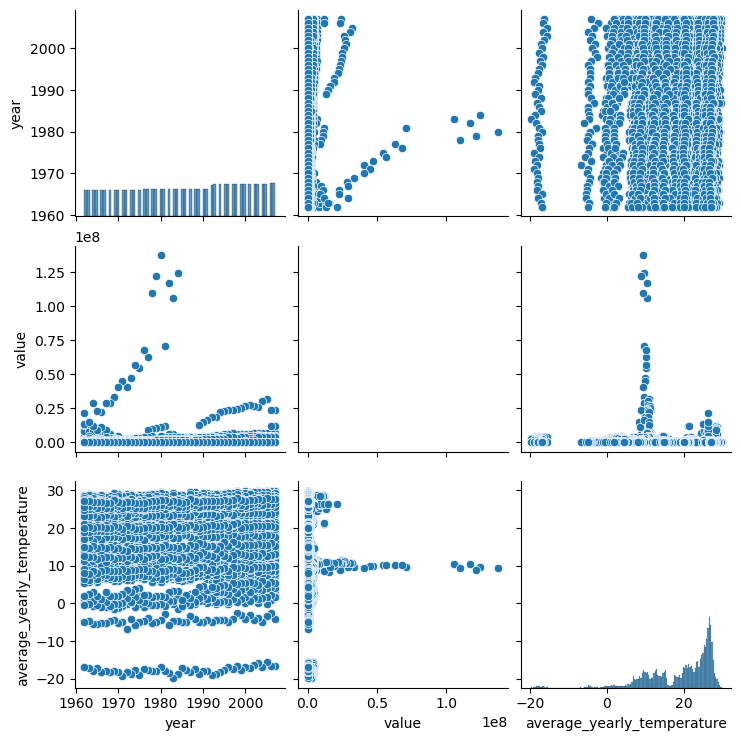

In [9]:
sns.pairplot(data)
plt.show()

As you can see during specific yearly tempreture the values are mostly centred which is not the highest. Therefore, constant increase of tempreture had adverse effect on the crop harvest as well.

### calculating correlation matrix for final data set 
A correlation matrix is used to summarize data, specifically to understand the relationships between different variables in a dataset. It's a square matrix where the variables are displayed on both rows and columns, and each cell shows the correlation coefficient between the variables.

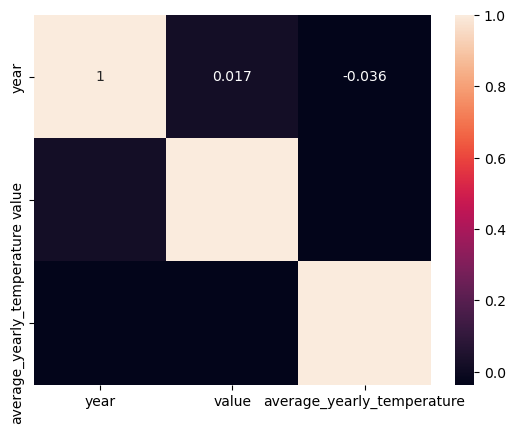

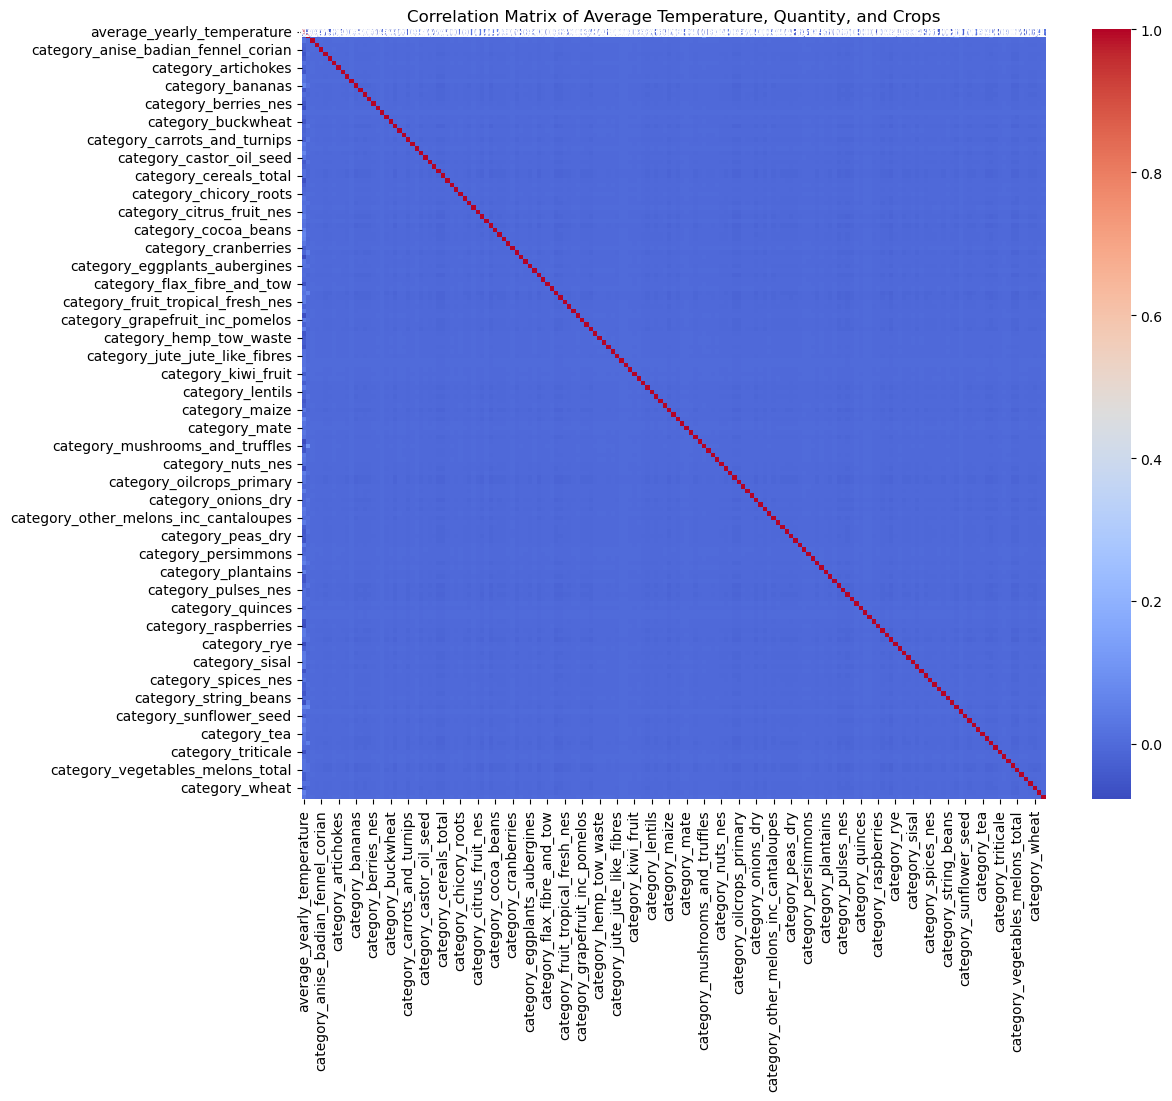

In [10]:
#Correlation Analysis
data_core= data
numeric_df = df.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



data_Q= data


# One-hot encode the 'crop' column
df_encoded = pd.get_dummies(data_Q, columns=['category'])

# Select the relevant columns
data_Z = df_encoded[['average_yearly_temperature', 'value'] + [col for col in df_encoded.columns if col.startswith('category_')]]

# Calculate the correlation matrix
correlation_matrix = data_Z.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Average Temperature, Quantity, and Crops')
plt.show()

Covariance Matrix: Look at the values to see how the variables co-vary. Higher absolute values indicate stronger relationships, but the units make direct comparison tricky.

Here with using labeling we can understand that on which temprature there are more elements available. Using label we can get on which part there are more crops. We are using scatter plot for finding it.


<bound method NDFrame.head of        element    year   unit    value          category      Country  \
0        Yield  2007.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
1        Yield  2006.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
2        Yield  2005.0  Hg/Ha  12571.0  agave_fibres_nes     Colombia   
3        Yield  2004.0  Hg/Ha  12430.0  agave_fibres_nes     Colombia   
4        Yield  2003.0  Hg/Ha  11997.0  agave_fibres_nes     Colombia   
...        ...     ...    ...      ...               ...          ...   
371863   Yield  1966.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371864   Yield  1965.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371865   Yield  1964.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371866   Yield  1963.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   
371867   Yield  1962.0  Hg/Ha  50000.0    yautia_cocoyam  Saint Lucia   

        average_yearly_temperature  
0                        25.494000  
1                  

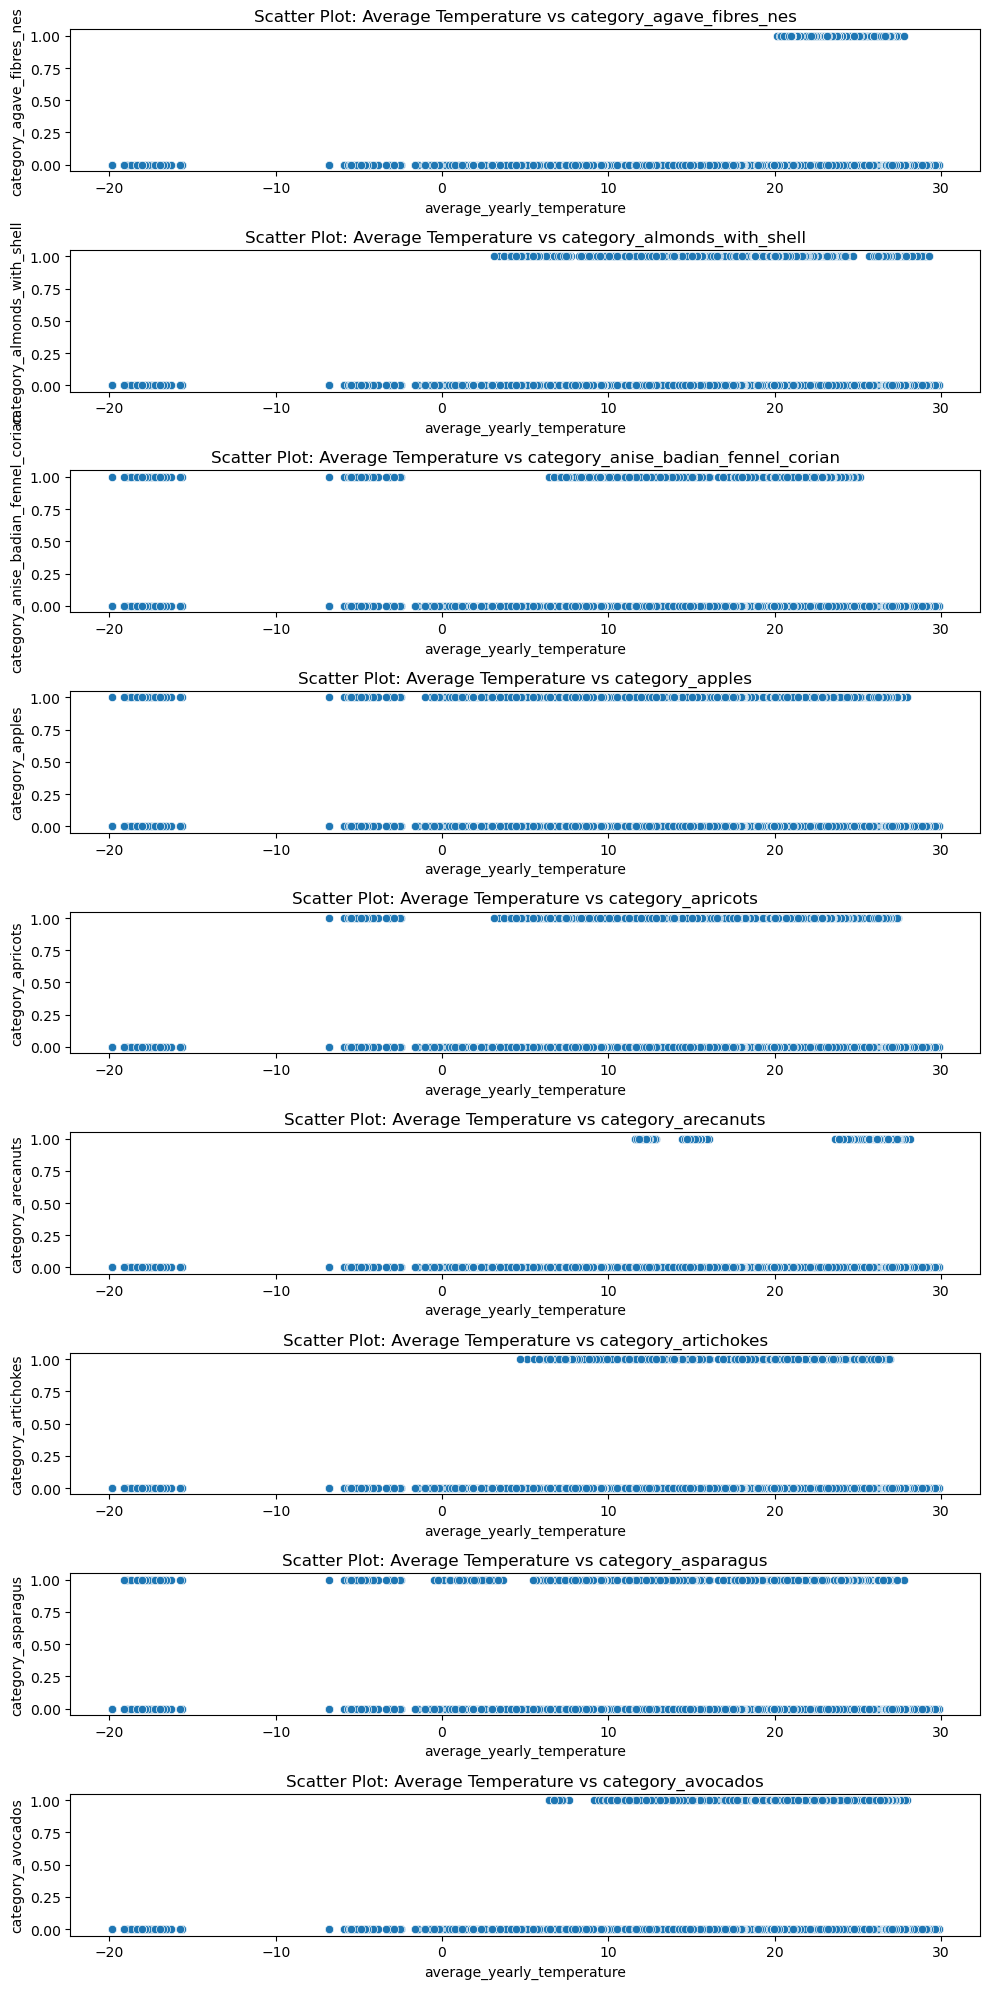

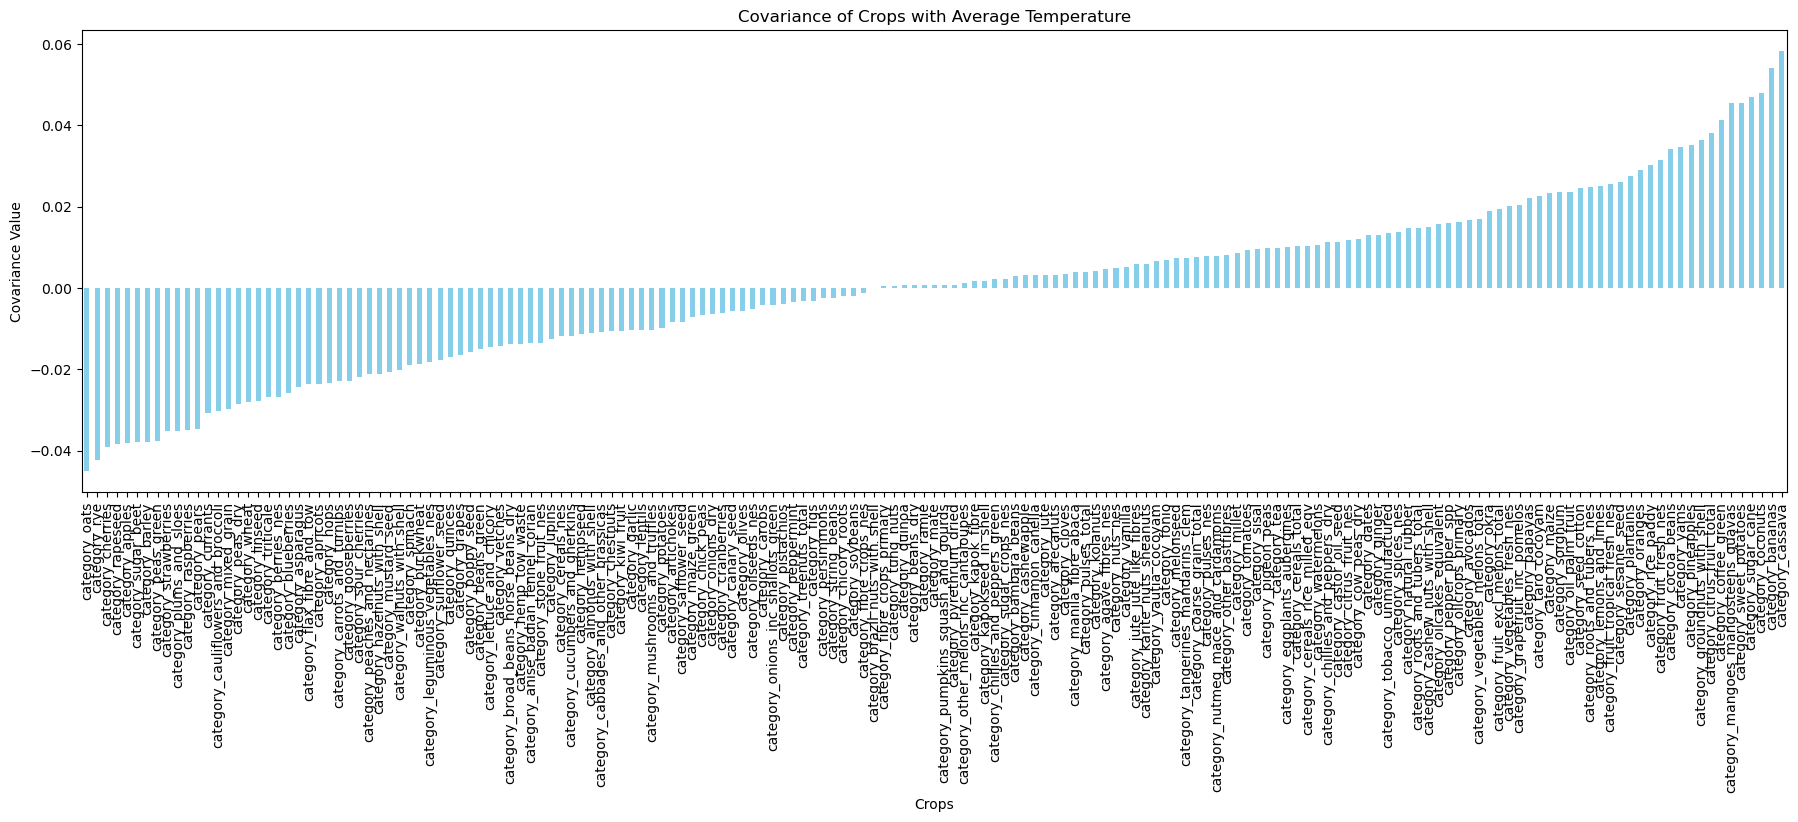

In [11]:
data_s=data
print(data_s.head)
# One-hot encode the 'crop' column
df_encoded = pd.get_dummies(data_s, columns=['category'])

# Select the relevant columns
data_r = df_encoded[['average_yearly_temperature', 'value'] + [col for col in df_encoded.columns if col.startswith('category_')]]

# Calculate the covariance matrix
cov_matrix = data_r.cov()

# Extract the covariance values between average temperature and crop quantities
cov_with_temp = cov_matrix.loc['average_yearly_temperature', [col for col in cov_matrix.columns if col.startswith('category_')]]

# Find the crop with the highest covariance with average temperature
max_cov_crop = cov_with_temp.idxmax()
max_cov_value = cov_with_temp.max()

print(f'The crop with the highest effect on climate change trends is {max_cov_crop} with a covariance value of {max_cov_value}')

# Plot scatter plots for each crop
fig, axes = plt.subplots(nrows= 9 , ncols=1, figsize=(10, 20))

for i, crop in enumerate([col for col in df_encoded.columns if col.startswith('category_')]):
    sns.scatterplot(ax=axes[i], x='average_yearly_temperature', y=crop, data=df_encoded)
    axes[i].set_title(f'Scatter Plot: Average Temperature vs {crop}')
    if( i == 8):
        break

plt.tight_layout()
plt.show()

# Plot the covariance values as a bar plot
plt.figure(figsize=(22, 6))
cov_with_temp.sort_values().plot(kind='bar', color='skyblue')
plt.title('Covariance of Crops with Average Temperature')
plt.xlabel('Crops')
plt.ylabel('Covariance Value')
plt.xticks(rotation=90)
plt.show()

In [12]:
unique_elements = data['category'].unique()
print(unique_elements)

['agave_fibres_nes' 'almonds_with_shell' 'anise_badian_fennel_corian'
 'apples' 'apricots' 'arecanuts' 'artichokes' 'asparagus' 'avocados'
 'bambara_beans' 'bananas' 'barley' 'beans_dry' 'beans_green'
 'berries_nes' 'blueberries' 'brazil_nuts_with_shell'
 'broad_beans_horse_beans_dry' 'buckwheat' 'cabbages_and_other_brassicas'
 'canary_seed' 'carobs' 'carrots_and_turnips' 'cashew_nuts_with_shell'
 'cashewapple' 'cassava' 'castor_oil_seed' 'cauliflowers_and_broccoli'
 'cereals_nes' 'cereals_rice_milled_eqv' 'cereals_total' 'cherries'
 'chestnuts' 'chick_peas' 'chicory_roots' 'chillies_and_peppers_dry'
 'chillies_and_peppers_green' 'cinnamon_canella' 'citrus_fruit_nes'
 'citrus_fruit_total' 'cloves' 'coarse_grain_total' 'cocoa_beans'
 'coconuts' 'coffee_green' 'cow_peas_dry' 'cranberries'
 'cucumbers_and_gherkins' 'currants' 'dates' 'eggplants_aubergines'
 'fibre_crops_nes' 'fibre_crops_primary' 'figs' 'flax_fibre_and_tow'
 'fonio' 'fruit_excl_melons_total' 'fruit_fresh_nes'
 'fruit_trop

Here we defined top three categories  by their product to see their effect on temprature.

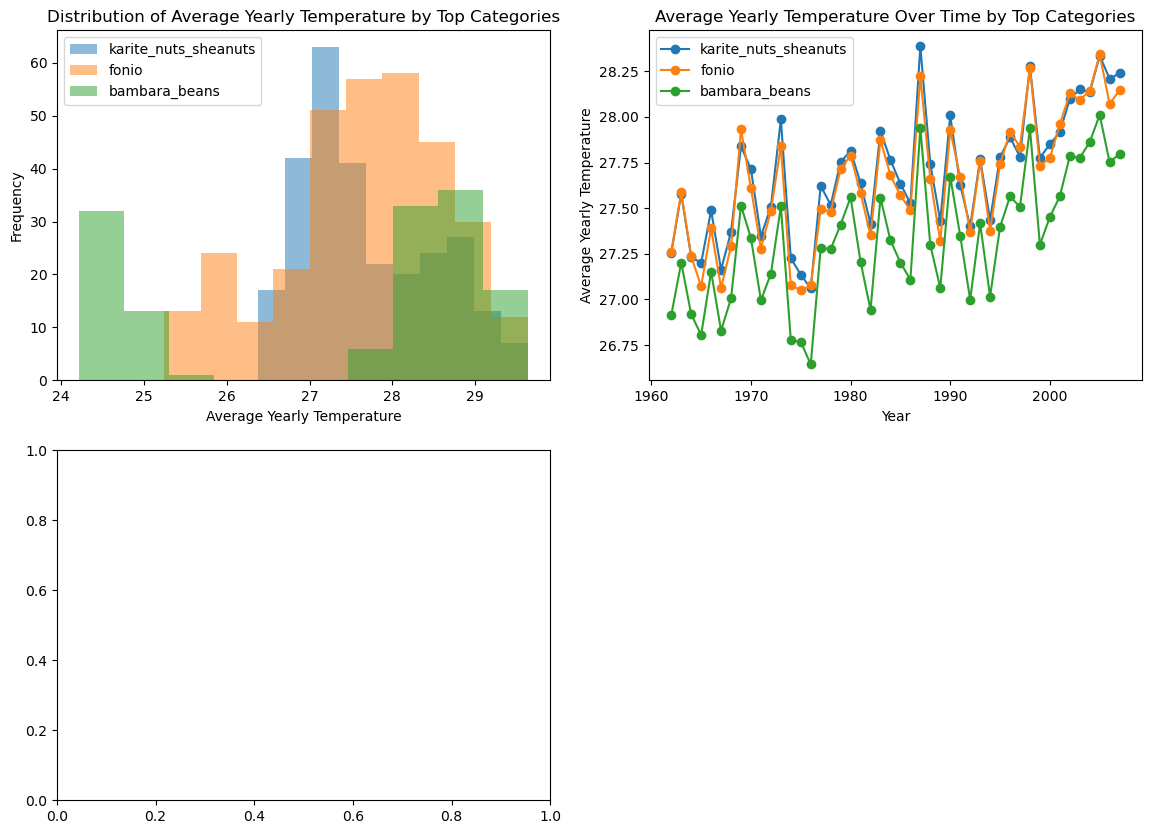

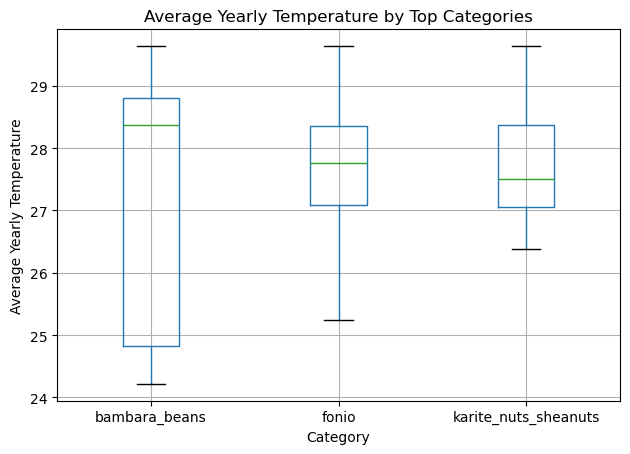

In [14]:
# Define the number of top categories to show
top_n = 3
data_check= data
# Identify the top N categories based on average yearly temperature
top_categories = data_check.groupby('category')['average_yearly_temperature'].mean().nlargest(top_n).index

# Filter the dataset to include only these top categories
filtered_df = data_check[data_check['category'].isin(top_categories)]



# Plotting with filtered dataset
plt.figure(figsize=(14, 10))

# Distribution of Average Yearly Temperature
plt.subplot(2, 2, 1)
for category in top_categories:
    subset = filtered_df[filtered_df['category'] == category]
    plt.hist(subset['average_yearly_temperature'], bins=10, alpha=0.5, label=category)
plt.title('Distribution of Average Yearly Temperature by Top Categories')
plt.xlabel('Average Yearly Temperature')
plt.ylabel('Frequency')
plt.legend()

# Trend Over Time
plt.subplot(2, 2, 2)
for category in top_categories:
    subset = filtered_df[filtered_df['category'] == category]
    yearly_avg_temp = subset.groupby('year')['average_yearly_temperature'].mean()
    plt.plot(yearly_avg_temp, marker='o', label=category)
plt.title('Average Yearly Temperature Over Time by Top Categories')
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.legend()

# Category Comparison
plt.subplot(2, 2, 3)
filtered_df.boxplot(column='average_yearly_temperature', by='category')
plt.title('Average Yearly Temperature by Top Categories')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Average Yearly Temperature')

plt.tight_layout()
plt.show()


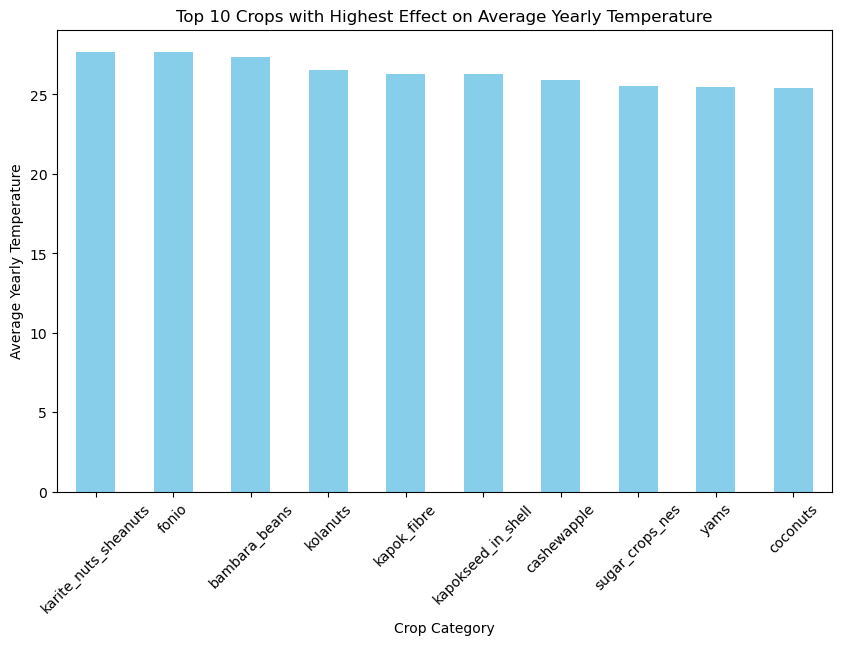

In [15]:
data_check = data

# Calculate the average effect for each crop category
average_effects = data_check.groupby('category')['average_yearly_temperature'].mean()

# Sort and select the top ten crops
top_crops = average_effects.nlargest(10)

# Visualization
top_crops.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Crops with Highest Effect on Average Yearly Temperature')
plt.xlabel('Crop Category')
plt.ylabel('Average Yearly Temperature')
plt.xticks(rotation=45)
plt.show()


### Time series analysis
* first concept is to see if through time series and machine learning how much is the yield increased
* Second is to see how much is the temprature for those elements increase as well
* choosing a subset for better examination

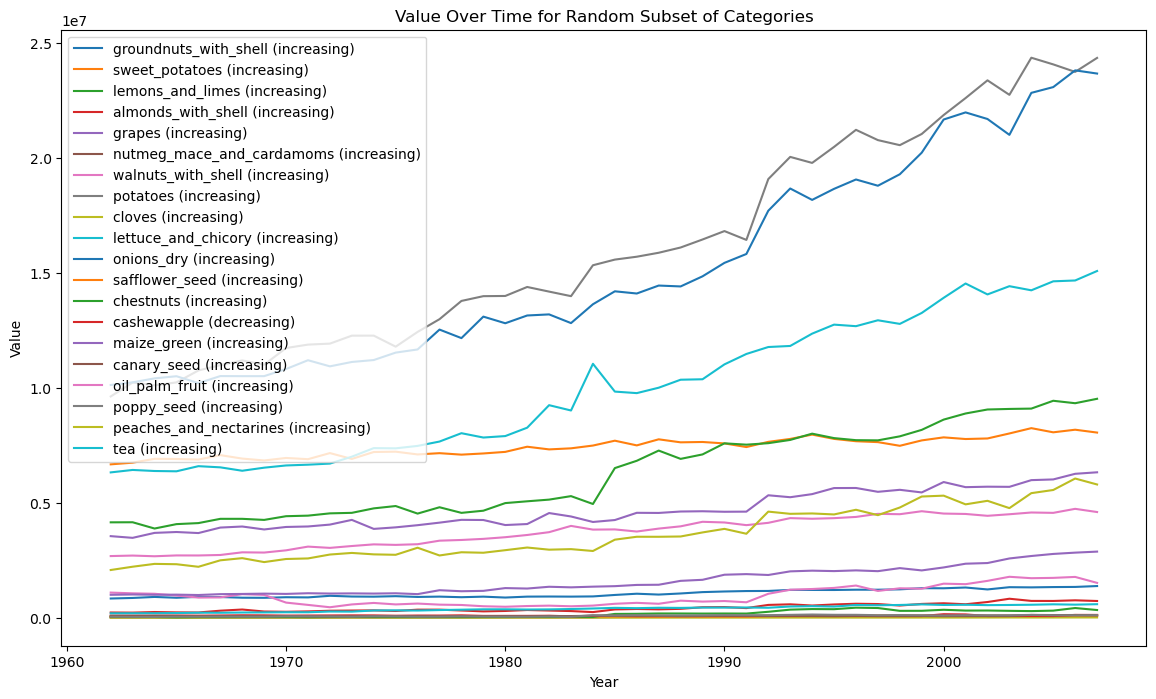

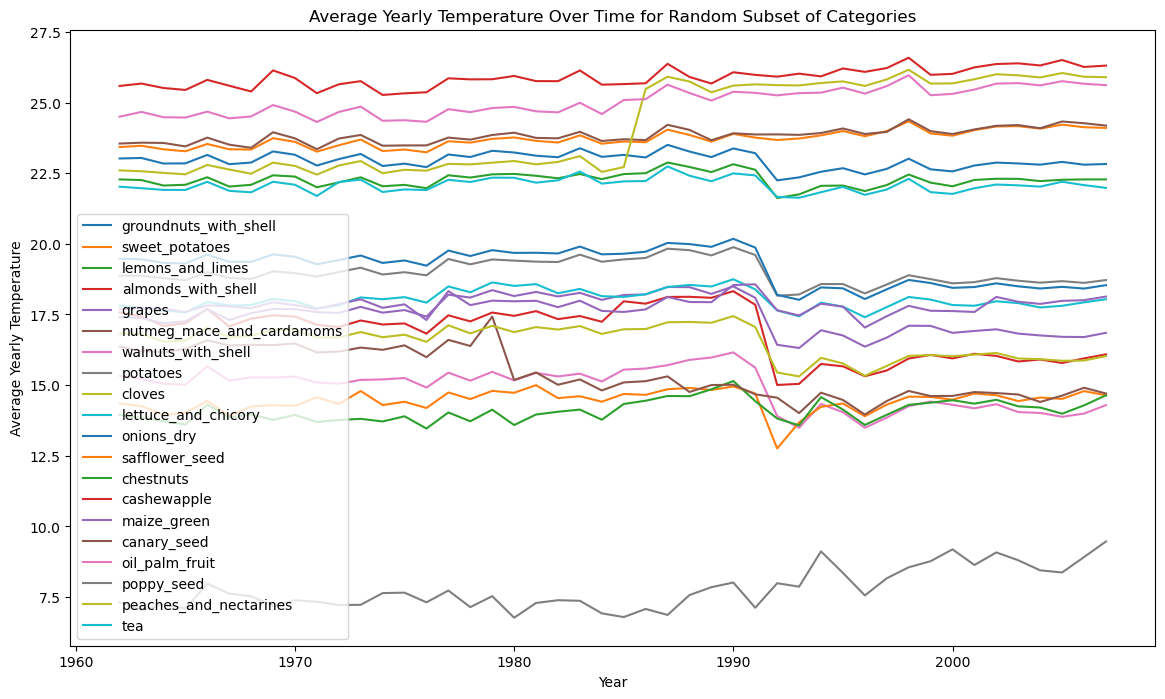

In [16]:
# Select a random subset of categories
unique_categories = data['category'].unique()
random_categories = np.random.choice(unique_categories, size=20, replace=False)  # Select 5 random categories

# Filter the dataset for the selected categories
filtered_df = data[data['category'].isin(random_categories)]

# Aggregate the data by year and category to get the sum of 'value'
agg_df = filtered_df.groupby(['year', 'category'])['value'].sum().reset_index()

# Function to perform trend analysis
def check_trend(data, category):
    # Fit a linear regression model
    X = data['year'].values.reshape(-1, 1)
    y = data['value'].values
    model = LinearRegression().fit(X, y)
    
    # Get the slope of the regression line
    slope = model.coef_[0]
    
    # Determine the trend
    trend = "increasing" if slope > 0 else "decreasing" if slope < 0 else "no trend"
    return slope, trend

# Perform trend analysis for each selected category and visualize
plt.figure(figsize=(14, 8))
trends = {}
for category in random_categories:
    subset = agg_df[agg_df['category'] == category]
    slope, trend = check_trend(subset, category)
    trends[category] = trend
    plt.plot(subset['year'], subset['value'], label=f'{category} ({trend})')

plt.title('Value Over Time for Random Subset of Categories')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the trends
trends

# Filter the dataset for the selected categories
filtered_df = data[data['category'].isin(random_categories)]

# Aggregate the data by year and category
agg_df = filtered_df.groupby(['year', 'category'])['average_yearly_temperature'].mean().reset_index()

# Visualize the time series data
plt.figure(figsize=(14, 8))
for category in random_categories:
    subset = agg_df[agg_df['category'] == category]
    plt.plot(subset['year'], subset['average_yearly_temperature'], label=category)
plt.title('Average Yearly Temperature Over Time for Random Subset of Categories')
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.legend()
plt.show()

ANother data set to further clarify the trends

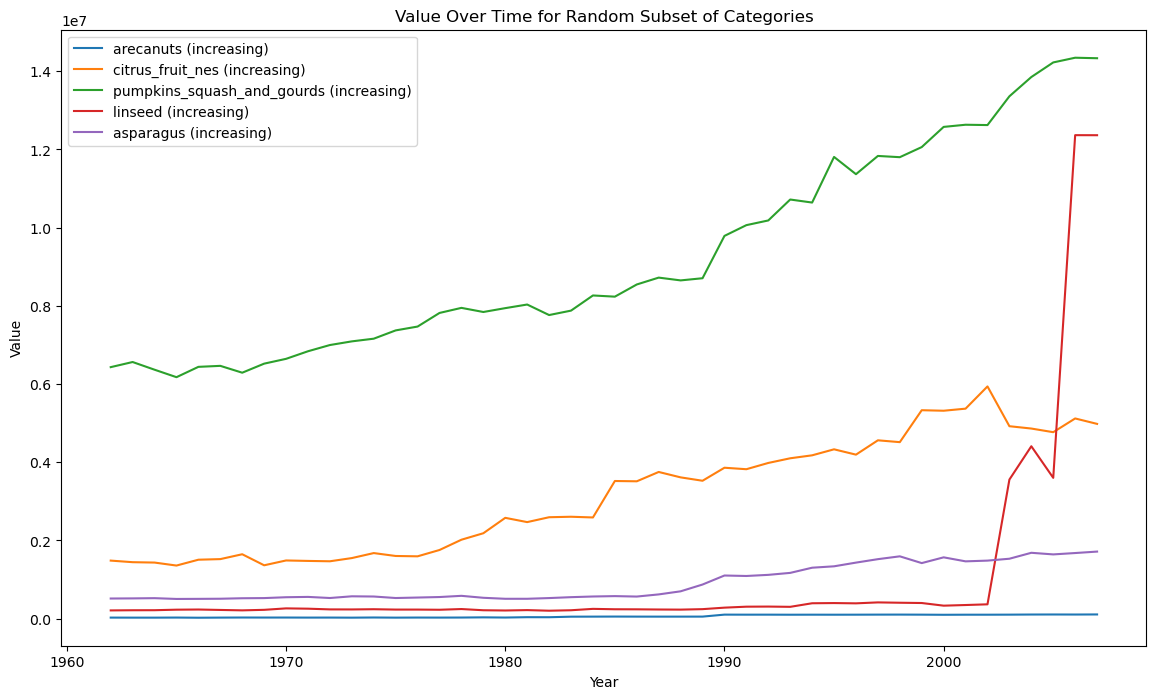

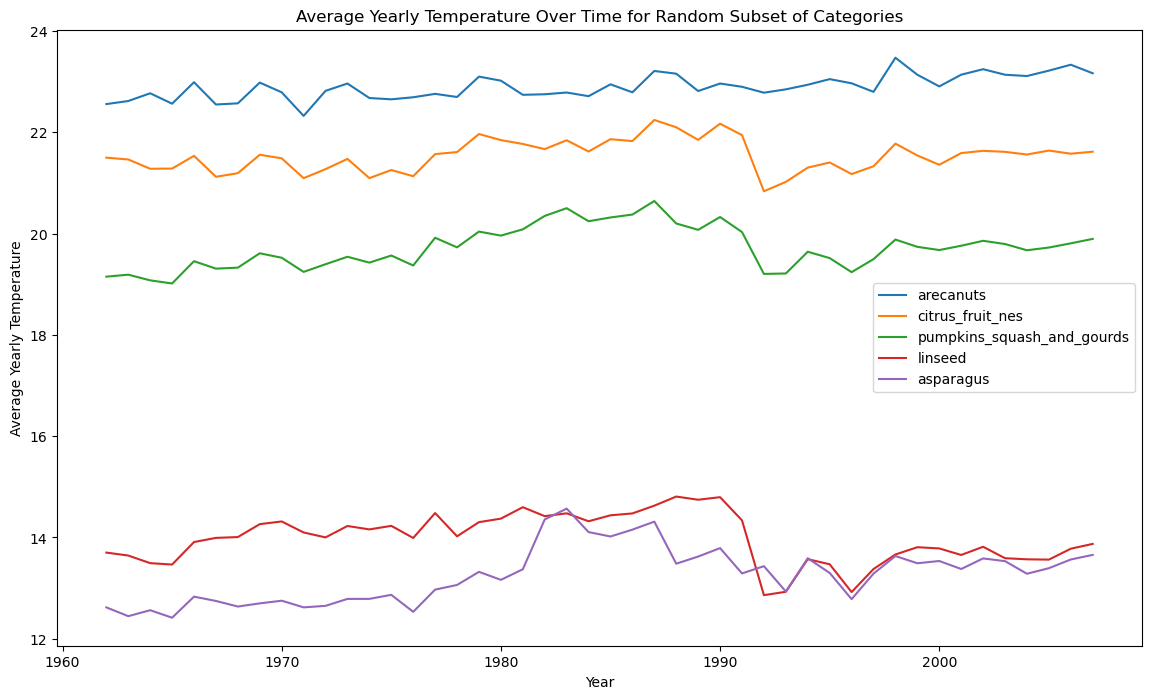

In [17]:
# Select a random subset of categories
unique_categories = data['category'].unique()
random_categories = np.random.choice(unique_categories, size=5, replace=False)  # Select 5 random categories

# Filter the dataset for the selected categories
filtered_df = data[data['category'].isin(random_categories)]

# Aggregate the data by year and category to get the sum of 'value'
agg_df = filtered_df.groupby(['year', 'category'])['value'].sum().reset_index()

# Function to perform trend analysis
def check_trend(data, category):
    # Fit a linear regression model
    X = data['year'].values.reshape(-1, 1)
    y = data['value'].values
    model = LinearRegression().fit(X, y)
    
    # Get the slope of the regression line
    slope = model.coef_[0]
    
    # Determine the trend
    trend = "increasing" if slope > 0 else "decreasing" if slope < 0 else "no trend"
    return slope, trend

# Perform trend analysis for each selected category and visualize
plt.figure(figsize=(14, 8))
trends = {}
for category in random_categories:
    subset = agg_df[agg_df['category'] == category]
    slope, trend = check_trend(subset, category)
    trends[category] = trend
    plt.plot(subset['year'], subset['value'], label=f'{category} ({trend})')

plt.title('Value Over Time for Random Subset of Categories')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the trends
trends

# Filter the dataset for the selected categories
filtered_df = data[data['category'].isin(random_categories)]

# Aggregate the data by year and category
agg_df = filtered_df.groupby(['year', 'category'])['average_yearly_temperature'].mean().reset_index()

# Visualize the time series data
plt.figure(figsize=(14, 8))
for category in random_categories:
    subset = agg_df[agg_df['category'] == category]
    plt.plot(subset['year'], subset['average_yearly_temperature'], label=category)
plt.title('Average Yearly Temperature Over Time for Random Subset of Categories')
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.legend()
plt.show()

### Top 10 categories

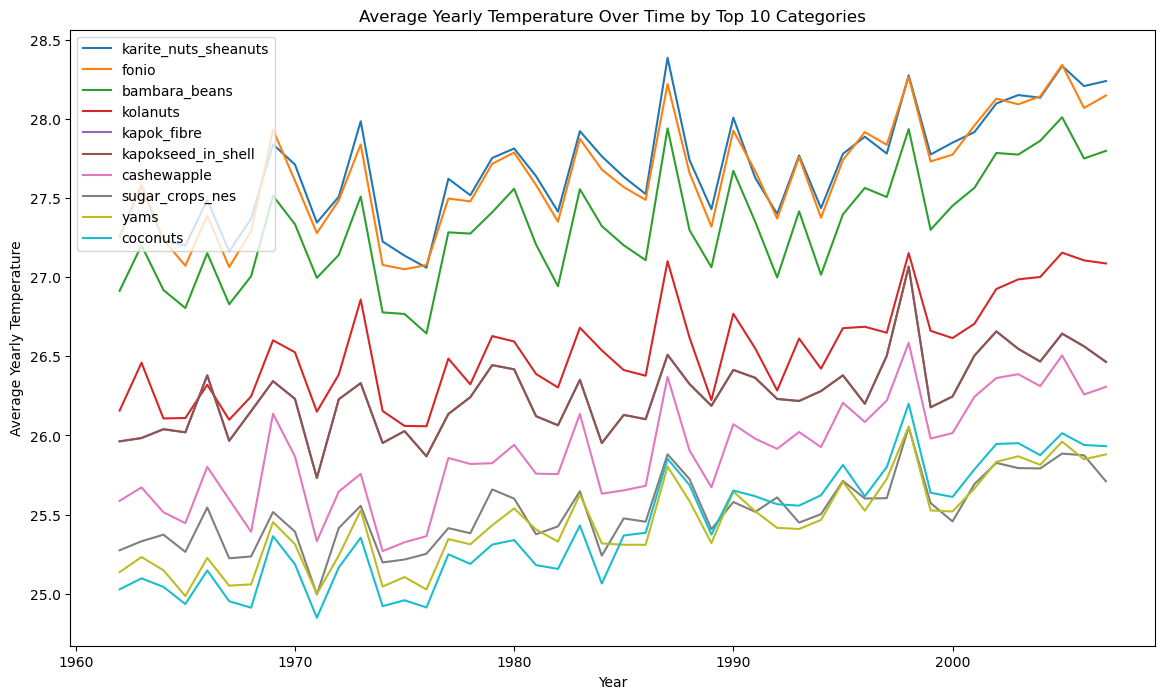

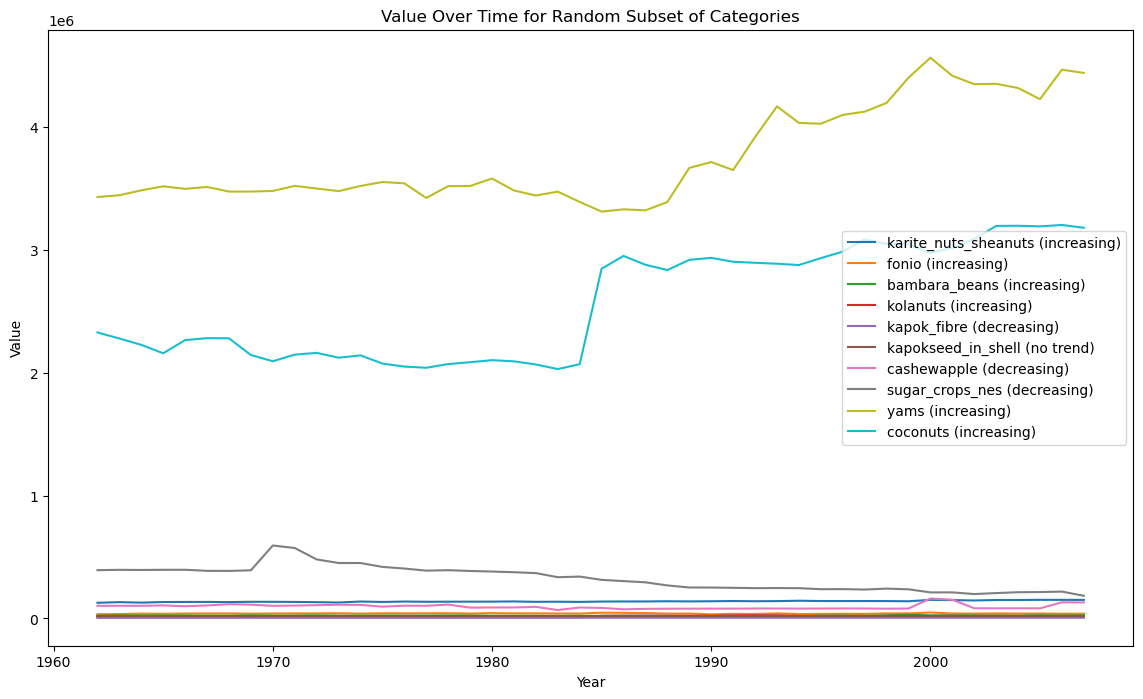

{'karite_nuts_sheanuts': 'increasing',
 'fonio': 'increasing',
 'bambara_beans': 'increasing',
 'kolanuts': 'increasing',
 'kapok_fibre': 'decreasing',
 'kapokseed_in_shell': 'no trend',
 'cashewapple': 'decreasing',
 'sugar_crops_nes': 'decreasing',
 'yams': 'increasing',
 'coconuts': 'increasing'}

In [18]:
# Step 2: Calculate the average effect for each crop category
average_effects = df.groupby('category')['average_yearly_temperature'].mean()

# Step 3: Identify the top ten categories
top_categories = average_effects.nlargest(10).index

# Filter the dataset to include only these top ten categories
filtered_df = df[df['category'].isin(top_categories)]

# Step 4: Aggregate the data by year and category
agg_df = filtered_df.groupby(['year', 'category'])['average_yearly_temperature'].mean().reset_index()

# Step 5: Visualize the time series data
plt.figure(figsize=(14, 8))
for category in top_categories:
    subset = agg_df[agg_df['category'] == category]
    plt.plot(subset['year'], subset['average_yearly_temperature'], label=category)
plt.title('Average Yearly Temperature Over Time by Top 10 Categories')
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.legend()
plt.show()

filtered_df = data[data['category'].isin(top_categories)]

# Aggregate the data by year and category to get the sum of 'value'
agg_df = filtered_df.groupby(['year', 'category'])['value'].sum().reset_index()

# Function to perform trend analysis
def check_trend(data, category):
    # Fit a linear regression model
    X = data['year'].values.reshape(-1, 1)
    y = data['value'].values
    model = LinearRegression().fit(X, y)
    
    # Get the slope of the regression line
    slope = model.coef_[0]
    
    # Determine the trend
    trend = "increasing" if slope > 0 else "decreasing" if slope < 0 else "no trend"
    return slope, trend

# Perform trend analysis for each selected category and visualize
plt.figure(figsize=(14, 8))
trends = {}
for category in top_categories:
    subset = agg_df[agg_df['category'] == category]
    slope, trend = check_trend(subset, category)
    trends[category] = trend
    plt.plot(subset['year'], subset['value'], label=f'{category} ({trend})')

plt.title('Value Over Time for Random Subset of Categories')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display the trends
trends

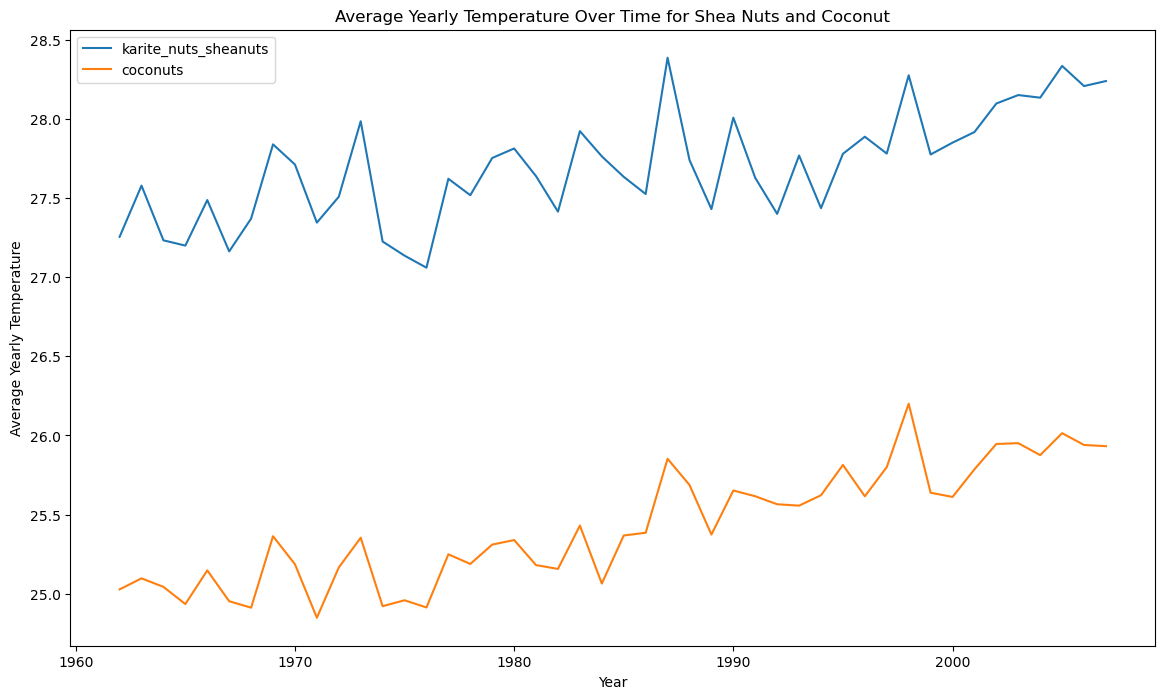

In [19]:


# Filter the dataset for shea nuts and coconut
filtered_df = data[data['category'].isin(['karite_nuts_sheanuts', 'coconuts'])]

# Aggregate the data by year and category
agg_df = filtered_df.groupby(['year', 'category'])['average_yearly_temperature'].mean().reset_index()

# Visualize the time series data
plt.figure(figsize=(14, 8))
for category in ['karite_nuts_sheanuts', 'coconuts']:
    subset = agg_df[agg_df['category'] == category]
    plt.plot(subset['year'], subset['average_yearly_temperature'], label=category)
plt.title('Average Yearly Temperature Over Time for Shea Nuts and Coconut')
plt.xlabel('Year')
plt.ylabel('Average Yearly Temperature')
plt.legend()
plt.show()


### 3. Results
#### The question is: "Which crops are most impactful on climate change, and which alternatives could be pursued for reduced environmental impact?"
Now we can go back to our initial question which was the above question and we can discuss it in more details.

Upon diving into the data from two different sources, a fascinating trend emerged. It appeares that in most cases with an increase in the number of harvest from different countries, an increasing trend of tempratrue increase is seen as well. Also there is sudden jump in the temrature when we have a sudden surge in the proudction of a specific product such as 'coconuts'.However with 'sugar crops ' constant decrease we still see a little yet conspecuous surge in temprature. Over all in the final plot you can see the top ten effective crops on temprature and their production status.

{'karite_nuts_sheanuts': 'increasing',
 'fonio': 'increasing',
 'bambara_beans': 'increasing',
 'kolanuts': 'increasing',
 'kapok_fibre': 'decreasing',
 'kapokseed_in_shell': 'no trend',
 'cashewapple': 'decreasing',
 'sugar_crops_nes': 'decreasing',
 'yams': 'increasing',
 'coconuts': 'increasing'}

### 4. Discussion
#### 4.1 Summary of Findings:
Trend:
Highlight the observed trend of higher temprature increase with an overall increase the crop harvest in different parts of worlds.

Alternative messures:
for instance 'karite_nuts_sheanuts', 'coconuts' are two crops that are intensively examined and coconuts are known to be a good alternative in terms of usage to  the karite. But there are several notions to be considered:
* Climate: Tropical climate similar to regions where shea trees grow.
* Uses: Coconut oil is a versatile product used in food, cosmetics, and industrial applications.
* Harvest Energy: Manual or mechanical harvesting methods are available, with energy requirements for processing comparable to shea nuts.
thus making it a viable alternative due to considering a broader outlook of alternation with regard to various aspects.

#### 4.2 Possible Explanations:
Fluctuation trend:
Sudden increase in temprature even with decrease in production shows a direct effect of overall global population increase and great effect of alternative foods and harvestings to compensate for the evergrowing population of world.
Social Structures and Behaviors:
Better agricultural methods and modern approches and standards such as Netherlands methods which is a top player and most important producer makes great difference as the less advanced and efficent methods of south american countries.

Ohter underlying reasons:
Global warming is affected by various factors and agriculture sector is indeed a key part of industrial world, however there are several other aspects such as production facilities and use of fossil resources that have their signifacnt effect on that specific period of time.

#### 4.3 Considerations and Limitations:
Data Quality and Variability:
Acknowledging limitations related to data accuracy, completeness, and consistency across diverse countries is crucial.

Multifactorial Nature:
Economic status alone may not fully explain infection rates; various factors like population density, governance, and cultural norms like eating certain crops might contribute significantly.

#### 4.4 Future Research Directions:
In-depth Analysis:
Further studies are needed to unravel the specific factors underlying the observed trend.

Focused Analyses:
Comparative studies targeting specific regions or countries could offer nuanced insights into the relationship between temprature and crop harvesting as some regions might not be able to stasify their needs with other alternative crops due to environment, cost and geo political sutiation.

Policy Implications:
Understanding this relationship could influence long-term public health strategies and policy-making. As the trends of harvesting can greatly replace the other crop considering all the pros and cons.

#### 4.5 Conclusion:
The unexpected correlation between crops and temprature indicates a far more intricate and sophisticated look at this greatly mystrious project. As previously explained, there are several factors and elements with regard to choosing an alternative crop which will reduce the temprature to an extent but has other disadvantagous effects on economy and geo policy. Due to this fact, a far more comprehensive reasearch must be conducted with meticulous data regarding all the effectual aspects.